In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

Using TensorFlow backend.


**Data Import**

In [2]:
train_path='Dataset/Train'
valid_path='Dataset/Valid'
test_path='Dataset/Test'

In [3]:

datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='constant',
    height_shift_range=0.1,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

**Batch Generation**

In [4]:
train_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size=(224,224),batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path, target_size=(224,224),batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size=(224,224),batch_size=10, shuffle=False)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [5]:
def plots(ims,figsize=(50,10),rows=1,interp=False, titles=None):
    if type(ims[0])is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if(ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=40)
        plt.imshow(ims[i], interpolation= None if interp else 'none')

c:\users\shubh\pymol\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


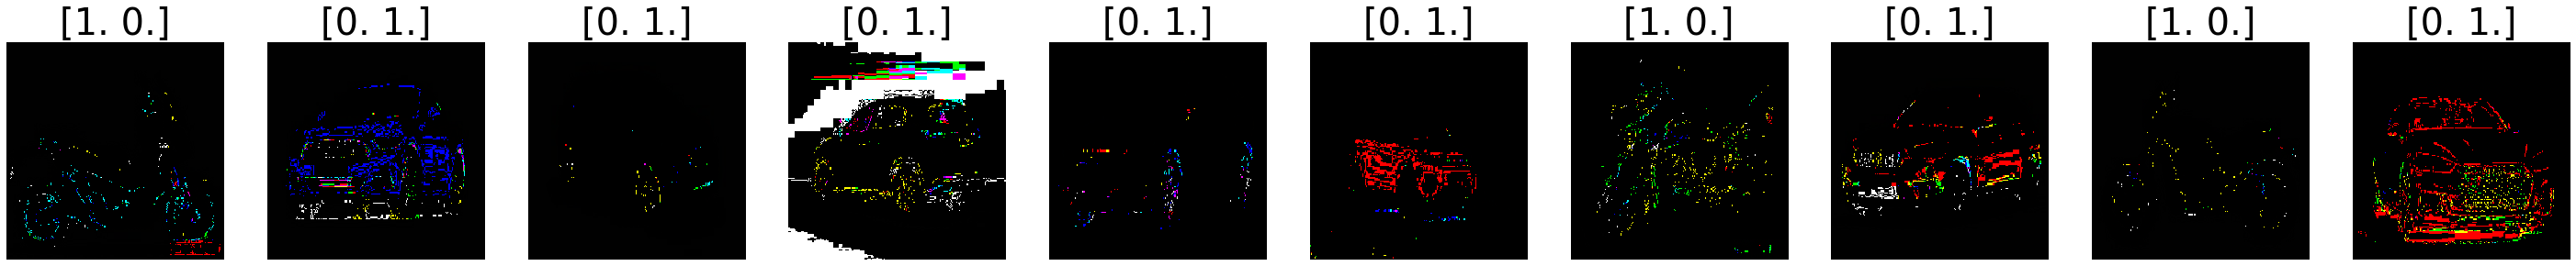

In [6]:
imgs, labels=next(train_batches)
plots(imgs,titles=labels)

**Build and Train CNN**

In [7]:
model= Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
mobile=keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 24s 1us/step


In [9]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [10]:
x=mobile.layers[-6].output
predictions= Dense(2, activation='softmax')(x)
model= Model(inputs=mobile.input, outputs=predictions)

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [12]:
for layer in model.layers[:-5]:
    layer.trainable=False
    

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=2, epochs=30, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 6s - loss: 0.3396 - accuracy: 0.8000 - val_loss: 3.0245e-05 - val_accuracy: 1.0000
Epoch 2/30
 - 5s - loss: 6.2371e-04 - accuracy: 1.0000 - val_loss: 1.6093e-07 - val_accuracy: 1.0000
Epoch 3/30
 - 5s - loss: 3.7141e-05 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 4/30
 - 5s - loss: 0.4098 - accuracy: 0.9250 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 5/30
 - 5s - loss: 4.9430e-04 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 6/30
 - 6s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 7/30
 - 6s - loss: 2.2054e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 8/30
 - 6s - loss: 9.2686e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 9/30
 - 6s - loss: 1.3797e-05 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 10/30
 - 6s - loss: 1.5199e-07 - accuracy: 1.0000

**Prediction on test set**

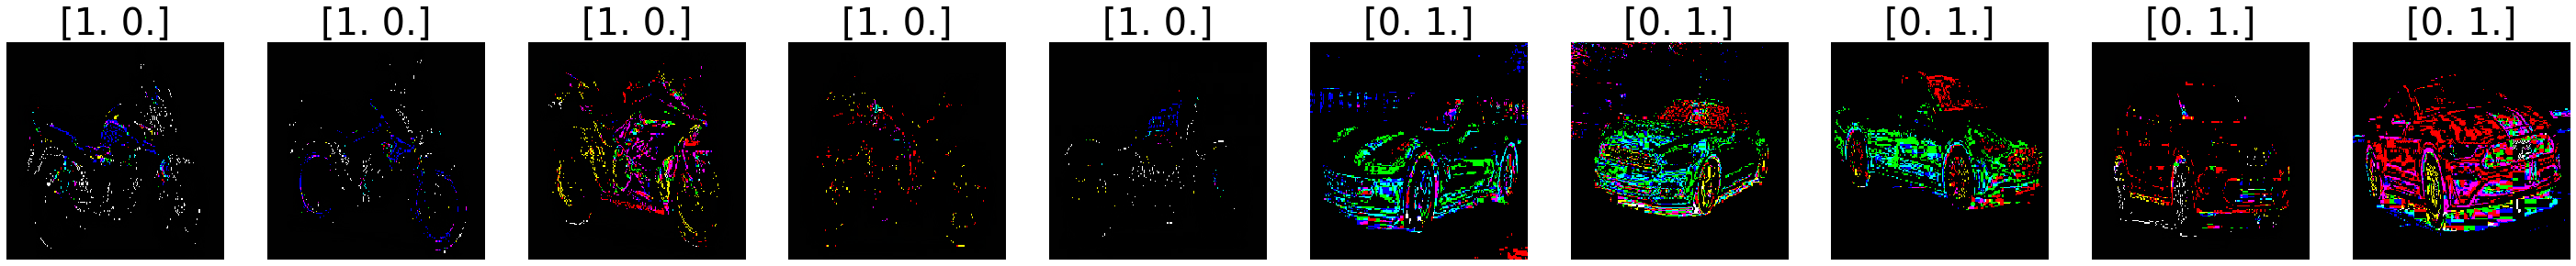

In [15]:
test_imgs, test_labels=next(test_batches)
plots(test_imgs, titles=test_labels)

In [16]:
test_labels=test_batches.classes

In [17]:
test_batches.class_indices

{'Bikes': 0, 'Cars': 1}

In [18]:
predictions=model.predict_generator(test_batches, steps=1, verbose=0)

In [19]:
predictions

array([[1.0000000e+00, 1.4097366e-15],
       [1.0000000e+00, 1.2751033e-14],
       [1.0000000e+00, 6.4810943e-14],
       [1.0000000e+00, 2.4781501e-12],
       [1.0000000e+00, 1.1816095e-08],
       [4.8436483e-13, 1.0000000e+00],
       [1.0840637e-12, 1.0000000e+00],
       [3.3580055e-12, 1.0000000e+00],
       [2.1643159e-11, 1.0000000e+00],
       [1.3614748e-12, 1.0000000e+00]], dtype=float32)

In [20]:
cm=confusion_matrix(test_labels, predictions.argmax(axis=1))

In [21]:
cm

array([[5, 0],
       [0, 5]], dtype=int64)

In [22]:
def plot_confusion_matrix(cm,classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion matrix")
    else:
        print("confusion matrix without normalization")
        print(cm)
    
    thresh=cm.max()/2,
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else  "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

confusion matrix without normalization
[[5 0]
 [0 5]]


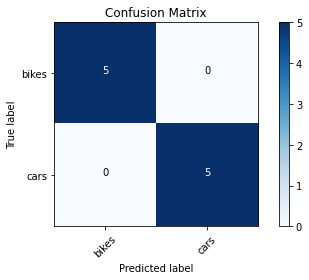

In [23]:
cm_plot_labels=['bikes','cars']
plot_confusion_matrix(cm, cm_plot_labels,title="Confusion Matrix")